In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [2]:
%tensorflow_version 2.x 

import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

TensorFlow 2.x selected.


In [0]:
# with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/Project/CNN/DogBreed_Classification/labels.csv.zip', 'r') as file:
#     print(file.printdir())
#     print('Extracting all files...')
#     file.extractall()
#     print('Done!')

File Name                                             Modified             Size
labels.csv                                     2017-09-28 15:38:40       482063
None
Extracting all files...
Done!


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = '/content/drive/My Drive/Colab Notebooks/Project/CNN/DogBreed_Classification/'

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
with ZipFile(project_path + 'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path + 'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
sample_submission_df = pd.read_csv(project_path + 'sample_submission.csv.zip')

Repeat the same step for labels.csv.zip

In [0]:
labels_df = pd.read_csv(project_path + 'labels.csv.zip')

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
# pandas can directly read the csv file from the zip  file 
labels_df.sample(10)

,id,breed
8010,c86f8b08a4dcdb08f1f27a7b288d5af4,briard
7196,b4446e631a52265229fd439b18a2df4d,mexican_hairless
3756,5d5a293c8ebe209ebebcf0910c695ea6,miniature_schnauzer
8078,c9e7fe5e9da49b87e149cb8e317570e5,sussex_spaniel
62,018aae5768833c34e3df30d63429251e,basset
8413,d33a9df2a23a1ff3ef29ac6694cc7e79,appenzeller
4895,7ad0e25ffd38d42c1111ca64b54430f8,standard_schnauzer
2559,3fbcf669fce6ecb27c5e9b46e6fdf889,lakeland_terrier
7702,c0d10ee669b1ccc5bc60950efd19cd53,boston_bull
3368,538921b32a385b9e4cd5ce4dbb0ba462,german_shepherd


In [0]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


### Print the count of each category of Dogs given in the dataset



In [0]:
labels_df['breed'].nunique()

120

In [0]:
labels_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


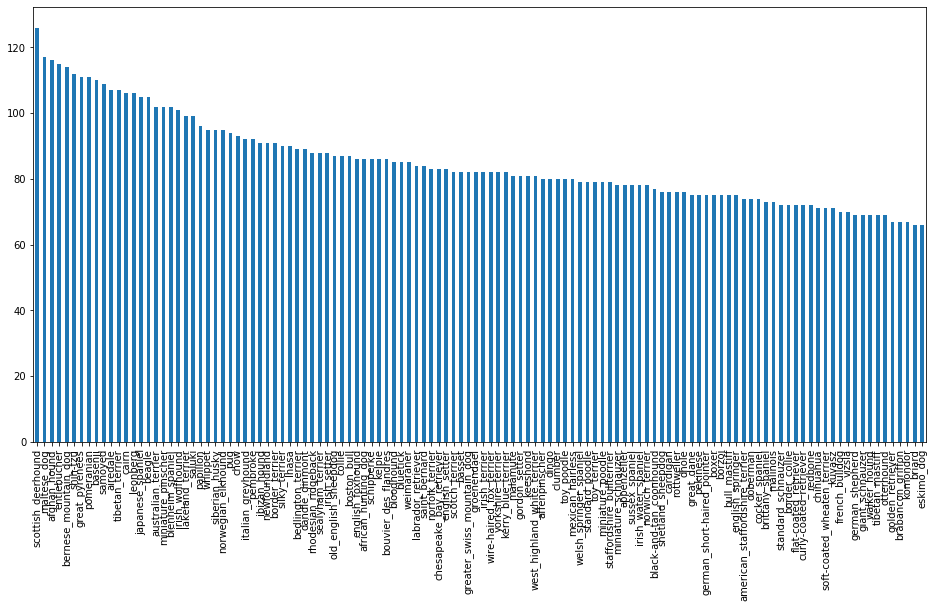

In [0]:
labels_df['breed'].value_counts().plot('bar', figsize=(16,8), colormap='tab20')

### Get one-hot encodings of labels

In [6]:
label_encoder =  LabelEncoder()
breed_encoded = label_encoder.fit_transform(labels_df['breed'])
print(breed_encoded)

[19 37 85 ...  3 75 28]


In [0]:
y = to_categorical(breed_encoded)

In [8]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols =128
num_channel = 1

In [10]:
x_feature =[]

for f , img in tqdm(labels_df.values):
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
    x_feature.append(train_img_resize)

100%|██████████| 10222/10222 [00:27<00:00, 373.84it/s]


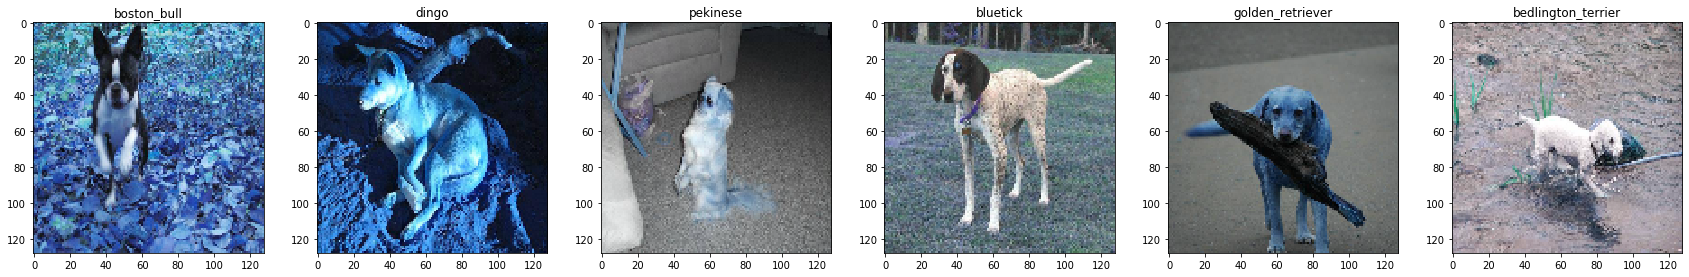

In [0]:
plt.figure(figsize=(50,50))

for i in range(3):
  plt.subplot(10,10,i+1)
  plt.imshow(x_feature[i], cmap=plt.cm.binary)
  plt.title(labels_df['breed'][i])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [11]:
x_feature = np.array(x_feature, dtype=np.float32)

x_feature /= 255.0
print('x_feature shape:', x_feature.shape)

x_feature shape: (10222, 128, 128, 3)


In [12]:
x_feature[2]

array([[[0.38431373, 0.40784314, 0.4117647 ],
        [0.41568628, 0.43529412, 0.4392157 ],
        [0.4117647 , 0.43137255, 0.43529412],
        ...,
        [0.17254902, 0.18039216, 0.22352941],
        [0.01568628, 0.01568628, 0.05490196],
        [0.07450981, 0.07843138, 0.07058824]],

       [[0.33333334, 0.3529412 , 0.3529412 ],
        [0.38039216, 0.39607844, 0.4       ],
        [0.39607844, 0.4117647 , 0.41568628],
        ...,
        [0.1764706 , 0.18431373, 0.22352941],
        [0.21176471, 0.21568628, 0.25490198],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.3372549 , 0.3529412 , 0.36078432],
        [0.30588236, 0.32156864, 0.3254902 ],
        [0.35686275, 0.37254903, 0.3764706 ],
        ...,
        [0.19215687, 0.20392157, 0.23529412],
        [0.18431373, 0.19215687, 0.22352941],
        [0.03137255, 0.02745098, 0.03529412]],

       ...,

       [[0.74509805, 0.75686276, 0.75686276],
        [0.7294118 , 0.7372549 , 0.7411765 ],
        [0.78039217, 0

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
trainX, validationX, trainY, validationY = train_test_split(x_feature,y, test_size=0.2, random_state=21)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = sample_submission_df['id']
test_img.shape

(10357,)

Run the below code to load the test image files in x_test_feature

In [0]:
test_img.values

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype=object)

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:27<00:00, 372.75it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature, dtype=np.float32)

In [0]:
x_test_feature /= 255

In [0]:
x_test_feature = x_test_feature.reshape(x_test_feature.shape[0],128,128,3)

In [0]:
# Releasing some memory
del test_img
del x_feature

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape

In [0]:
tf.keras.backend.clear_session()

In [0]:
model = Sequential()

# Batch normalization
model.add(BatchNormalization())

## define a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3)

## 1st Conv Layer
model.add(Convolution2D(32, (5,5), padding='same', input_shape = (128, 128, 3))) 
model.add(Activation('relu'))
#Add MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

## 2nd Conv Layer
model.add(Convolution2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
#Add MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

# fully connected layer
model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(120, activation = 'softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
optimizer = Adam(lr=0.001)

In [0]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint_basic = tf.keras.callbacks.ModelCheckpoint('dog_breed_model.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [23]:
model_history = model.fit(trainX,trainY,
                    epochs=10, 
                    batch_size = 128,
                    validation_data=(validationX,validationY),
                    verbose = 1,
                    callbacks=[model_checkpoint_basic],
                    workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 6.8966 - accuracy: 0.0138 - val_loss: 5.1336 - val_accuracy: 0.0117
Epoch 2/10
8177/8177 [==============================] - 6s 676us/sample - loss: 4.5675 - accuracy: 0.0534 - val_loss: 5.7886 - val_accuracy: 0.0083
Epoch 3/10
8177/8177 [==============================] - 5s 670us/sample - loss: 4.1139 - accuracy: 0.1239 - val_loss: 6.6427 - val_accuracy: 0.0166
Epoch 4/10
8177/8177 [==============================] - 5s 671us/sample - loss: 3.6339 - accuracy: 0.2011 - val_loss: 5.4551 - val_accuracy: 0.0186
Epoch 5/10
8177/8177 [==============================] - 5s 670us/sample - loss: 3.1456 - accuracy: 0.2853 - val_loss: 5.3722 - val_accuracy: 0.0279
Epoch 6/10
8177/8177 [==============================] - 6s 675us/sample - loss: 2.7399 - accuracy: 0.3560 - val_loss: 5.3516 - val_accuracy: 0.0279
Epoch 7/10
8177/8177 [==============================] - 6s 673us/

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

In [0]:
val_datagen = ImageDataGenerator(rescale=1./255.)

In [0]:
# let's also add some custom learning rate 
# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 75:
#         lrate = 0.0005
#     if epoch > 100:
#         lrate = 0.0003
#     return lrate

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(trainX, trainY, seed=12, batch_size=32)

In [0]:
val_generator = val_datagen.flow(validationX, validationY, seed=12, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint_datagen_1 = tf.keras.callbacks.ModelCheckpoint('dog_breed_model_data_gen_1.h5', 
                                                save_best_only=True, 
                                                monitor='val_acc', 
                                                mode='max', 
                                                verbose=1)

In [49]:
hist_1 = model.fit(train_generator,
                steps_per_epoch=trainX.shape[0] // 32,
                epochs=10,
                verbose=1,
                validation_data=val_generator,
                callbacks=[model_checkpoint_datagen_1],
                workers=4)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255 steps, validate for 64 steps
Epoch 1/10
255/255 [==============================] - 27s 106ms/step - loss: 5.0468 - accuracy: 0.0114 - val_loss: 4.7924 - val_accuracy: 0.0054
Epoch 2/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7747 - accuracy: 0.0110 - val_loss: 4.7927 - val_accuracy: 0.0122
Epoch 3/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7748 - accuracy: 0.0115 - val_loss: 4.7929 - val_accuracy: 0.0122
Epoch 4/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7748 - accuracy: 0.0124 - val_loss: 4.7932 - val_accuracy: 0.0122
Epoch 5/10
255/255 [==============================] - 28s 111ms/step - loss: 4.7739 - accuracy: 0.0124 - val_loss: 4.7933 - val_accuracy: 0.0122
Epoch 6/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7803 - accuracy: 0.0122 - val_loss: 4.7935 - val_accuracy: 0.0122
Epoch 7/10
255/255 [=================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [0]:
project_path = '/content/drive/My Drive/Colab Notebooks/Project/CNN/'

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path + 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [35]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
# from tensorflow.keras.layers import Input

# output_vgg16 = base_model(input1)
# newmodel = Dense(1024, activation='relu', name='ds1',use_bias=False, kernel_initializer='uniform')(output_vgg16)
# newmodel = BatchNormalization()(newmodel)
# newmodel = Dense(256, activation='relu', name='ds2')(newmodel)
# newmodel=  Dropout(0.3)(newmodel)
# newmodel = Dense(120, activation='softmax', name='predictions',kernel_initializer='uniform')(newmodel)

In [0]:
#  Clear the session before building the model
tf.keras.backend.clear_session()

#Create a new model
model_new = tf.keras.models.Sequential()

#Add the base VGG model
model_new.add(base_model)

#Flatten the output
model_new.add(Flatten())

#First Dense layer
model_new.add(Dense(1024, activation='relu'))
model_new.add(Dropout(0.25))

#Second Dense layer
model_new.add(Dense(256, activation='relu'))
model_new.add(Dropout(0.25))

#Third Dense layer
model_new.add(Dense(120, activation='softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [52]:
for layer in base_model.layers:
    layer.trainable = False
    if("block5_conv3" in layer.name):
        print(layer.name)
        layer.trainable = True

block5_conv3


In [0]:
#Freezing layers in the model which don't have 'dense' in their name
# for layer in base_model.layers:
#   #if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
#     #Freezing a layer
#     layer.trainable = False

# #Module to print colourful statements
# from termcolor import colored

# #Check which layers have been frozen 
# for layer in base_model.layers:
#   print (colored(layer.name, 'blue'))
#   print (colored(layer.trainable, 'red'))

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [54]:
# mymodel = Model(input1, newmodel)
# optimizer = Adam(lr=0.1)

model_new.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               3

In [0]:
model_checkpoint_vgg = tf.keras.callbacks.ModelCheckpoint('dog_breed_model_vgg.h5', 
                                                save_best_only=True, 
                                                monitor='val_acc', 
                                                mode='max', 
                                                verbose=1)

In [56]:
history = model_new.fit(trainX,trainY,
                    epochs=10, 
                    validation_data=(validationX,validationY),
                    batch_size=20,
                    verbose = 1,
                    callbacks=[model_checkpoint_vgg])

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 24s 3ms/sample - loss: 4.6037 - accuracy: 0.0320 - val_loss: 4.2083 - val_accuracy: 0.0694
Epoch 2/10
8177/8177 [==============================] - 20s 2ms/sample - loss: 3.8182 - accuracy: 0.1015 - val_loss: 3.6446 - val_accuracy: 0.1178
Epoch 3/10
8177/8177 [==============================] - 20s 2ms/sample - loss: 3.2776 - accuracy: 0.1757 - val_loss: 3.2722 - val_accuracy: 0.1765
Epoch 4/10
8177/8177 [==============================] - 21s 3ms/sample - loss: 2.9433 - accuracy: 0.2347 - val_loss: 3.1175 - val_accuracy: 0.2333
Epoch 5/10
8177/8177 [==============================] - 21s 3ms/sample - loss: 2.6196 - accuracy: 0.2947 - val_loss: 3.0817 - val_accuracy: 0.2440
Epoch 6/10
8177/8177 [==============================] - 21s 3ms/sample - loss: 2.3661 - accuracy: 0.3468 - val_loss: 3.0625 - val_accuracy: 0.2616
Epoch 7/10
8177/8177 [==============================] - 21s 3ms/sample

In [59]:
# trying data augmentation
history = model_new.fit(train_generator,
                    steps_per_epoch=trainX.shape[0] // 32,
                    epochs=10,
                    validation_data=(validationX,validationY),
                    callbacks=[model_checkpoint_vgg],
                    workers=4)

  ...
    to  
  ['...']
Train for 255 steps, validate on 2045 samples
Epoch 1/10
255/255 [==============================] - 30s 117ms/step - loss: 1.6814 - accuracy: 0.5224 - val_loss: 3.3029 - val_accuracy: 0.2939
Epoch 2/10
255/255 [==============================] - 30s 116ms/step - loss: 1.5999 - accuracy: 0.5479 - val_loss: 3.3701 - val_accuracy: 0.2939
Epoch 3/10
255/255 [==============================] - 30s 117ms/step - loss: 1.5819 - accuracy: 0.5503 - val_loss: 3.4538 - val_accuracy: 0.2998
Epoch 4/10
255/255 [==============================] - 30s 117ms/step - loss: 1.5284 - accuracy: 0.5574 - val_loss: 3.4625 - val_accuracy: 0.2954
Epoch 5/10
255/255 [==============================] - 30s 116ms/step - loss: 1.4592 - accuracy: 0.5780 - val_loss: 3.4828 - val_accuracy: 0.2988
Epoch 6/10
255/255 [==============================] - 30s 117ms/step - loss: 1.4354 - accuracy: 0.5851 - val_loss: 3.5343 - val_accuracy: 0.3027
Epoch 7/10
255/255 [==============================] - 30s 1